# Sum Problem
Very simple problem, the aim is to get a list of 5 numbers that sum up to 15. Possible solutions would be `[3, 3, 3, 3, 3], [10, 5, 0, 0, 0], [1, 2, 3, 4, 5]`. 

First, let's define our fitness function. I used `-1.0` for `weights` which means that I am going to use minimizing fitness. Therefore, when it comes to breeding, the algorithm will choose individuals with the least fitness. `"FitnessMin"` is just a name for the function (like a variable name, is is up to you how to call it).

Then, I am going to define an individual. The second argument is the base class that the new type created should inherit from (in this case, I will use a list to store numbers). Also, we provide our fitness function. `"Individual"` is just a name for the function (like a variable name, is is up to you how to call it).

In [75]:
import random
from deap import base, creator, tools, algorithms

sum_up_to = 15 # the number that individuals have to sum up to
list_len = 5 # length of individuals
trn_size = 5 # the number of individuals participating in each tournament
mutate_prob = 0.10 # for mutation algorithm (probability of each attribute to be moved)

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

C:\Users\AGorp\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\Users\AGorp\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


## Toolbox

The first line simply creates a toolbox.

The second line is going to determine how the values for individuals will be generated. In this example, I want integers from 0 to 20, hence, my generating function is `random.randint, 0, 20`. `"attr_int"` is just a name for the function (like a variable name, it is up to you how to call it).

The third line, when called, will fill an individual with what is produced by `n` calls to the previously defined `attr_int` function. We also have to pass the individual function as well as generating function. Again, the first argument is just a name. 

The 4th line determines the underlying type for the population. Let it be a list. Since we passed individual from `creator` to toolbox on the 3rd line, we can take it from `toolbox` now. The first argument is what ? You know already.

In [76]:
toolbox = base.Toolbox()
toolbox.register("attr_int", random.randint, 0, 20)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, n=list_len)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

## It is time to check

Even though it was not a lot of code, all these lines are very critical to the application. Hence, it is important to check if everything works as expected. Let's create a random individual (line 1) and random population (line 2) and see if they look as expected.

In [77]:
ind = toolbox.individual()
pop = toolbox.population(n=3)

print("ind is of type %s and contains %d bits\n%s" % (type(ind), len(ind), ind))
print("pop is of type %s and contains %d individuals\n%s" % (type(pop), len(pop), pop))

ind is of type <class 'deap.creator.Individual'> and contains 5 bits
[16, 14, 18, 8, 9]
pop is of type <class 'list'> and contains 3 individuals
[[2, 9, 16, 7, 9], [5, 18, 12, 2, 8], [4, 4, 1, 7, 18]]


## Evaluation/fintess function 

Okay, so the next step is to define the evaluation function. It is going to tell the application how well individuals perform. Keep in mind that in this particular case, smaller fitness is better.

In [78]:
def fitness_func(individual):
    return abs(sum_up_to - sum(individual)),

## More on toolbox

We created our fitness function, now we have to pass it to the toolbox. Line number 1 does exactly that.

The two points crossover function is registered the same way under the alias `mate`. [Crossover function on wiki.](  https://en.wikipedia.org/wiki/Crossover_%28genetic_algorithm%29)

For mutation, we simply shuffle the attributes of the input individual and return the mutant. The `indpb` argument is the probability of each attribute to be moved. In this case, it is 10% or 0.1.

For selection function, I selected Tournament. It selects the best individual among tournsize randomly chosen individuals, k times.

In [79]:
toolbox.register("evaluate", fitness_func)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=mutate_prob)
toolbox.register("select", tools.selTournament, tournsize=trn_size)

## Time to run

Looks like we've got everything we need, the next step is to simulate natural selection. 

First, we have to generate a population, where `n` is the size of population (number of individuals). Hall of fame keeps track of the best individuals that ever appeared during the evolution. The statistics are computed using `numpy` functions on the population and used later to visualize the results. Once the evolution is finished the population contains the individuals from the last generation.

`cxpb` – The probability that an offspring is produced by crossover.

`mutpb` – The probability that an offspring is produced by mutation.

`ngen` - Number of generations.

`verbose` – Whether or not to log the statistics.

In [80]:
import numpy

number_of_generations = 10
crossover_prob = 0.5
mut_prob = 0.2

pop = toolbox.population(n=100)
hof = tools.HallOfFame(10)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=crossover_prob, mutpb=mut_prob, ngen=number_of_generations, stats=stats, halloffame=hof, verbose=True)

print("Best 10 individuals are:")
for item in hof:
    print("%s with fitness: %s" % (item, item.fitness))

gen	nevals	avg  	min	max
0  	100   	37.32	1  	66 
1  	67    	22.23	1  	44 
2  	60    	10.66	0  	33 
3  	72    	4.22 	0  	17 
4  	68    	2.64 	0  	12 
5  	65    	2.33 	0  	12 
6  	51    	1.3  	0  	11 
7  	58    	1.26 	0  	10 
8  	53    	0.86 	0  	11 
9  	65    	2.6  	0  	11 
10 	62    	1.06 	0  	11 
Best 10 individuals are:
[1, 11, 1, 2, 0] with fitness: (0.0,)
[11, 2, 1, 1, 0] with fitness: (0.0,)
[0, 2, 11, 2, 0] with fitness: (0.0,)
[11, 1, 0, 2, 1] with fitness: (0.0,)
[1, 1, 11, 2, 0] with fitness: (0.0,)
[1, 1, 2, 11, 0] with fitness: (0.0,)
[1, 0, 2, 11, 1] with fitness: (0.0,)
[0, 2, 0, 2, 11] with fitness: (0.0,)
[4, 4, 0, 7, 0] with fitness: (0.0,)
[11, 1, 1, 2, 0] with fitness: (0.0,)


## Plot fitness

If you like, you can plot fitness over generations to see how the program improves over time.

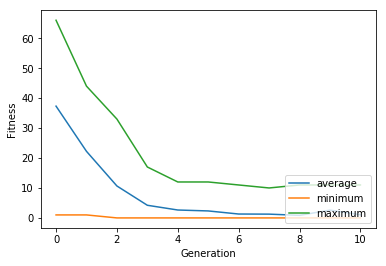

In [81]:
import matplotlib.pyplot as plt
gen, avg, min_, max_ = logbook.select("gen", "avg", "min", "max")
plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.plot(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.show()

## All code together

gen	nevals	avg  	min	max
0  	100   	36.63	7  	66 
1  	61    	21.32	2  	47 
2  	49    	11.54	0  	35 
3  	71    	5.85 	0  	20 
4  	60    	2.58 	0  	10 
5  	64    	2.01 	0  	10 
6  	55    	2.04 	0  	10 
7  	59    	1.77 	0  	10 
8  	61    	1.18 	0  	7  
9  	59    	1.44 	0  	16 
10 	58    	1.72 	0  	12 
Best 10 individuals are:
[3, 12, 0, 0, 0] with fitness: (0.0,)
[3, 0, 0, 0, 12] with fitness: (0.0,)
[5, 0, 0, 7, 3] with fitness: (0.0,)
[5, 0, 7, 0, 3] with fitness: (0.0,)
[1, 0, 7, 4, 3] with fitness: (0.0,)
[1, 0, 7, 3, 4] with fitness: (0.0,)
[5, 1, 0, 9, 0] with fitness: (0.0,)
[3, 0, 3, 0, 9] with fitness: (0.0,)
[5, 0, 0, 9, 1] with fitness: (0.0,)
[9, 3, 0, 0, 3] with fitness: (0.0,)


C:\Users\AGorp\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\Users\AGorp\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


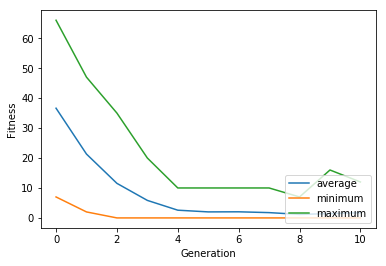

In [82]:
import random
from deap import base, creator, tools, algorithms
import numpy
import matplotlib.pyplot as plt

def fitness_func(individual):
    return abs(sum_up_to - sum(individual)),

sum_up_to = 15 # the number that individuals have to sum up to
list_len = 5 # length of individuals
trn_size = 5 # the number of individuals participating in each tournament
mutate_prob = 0.10 # for mutation algorithm (probability of each attribute to be moved)

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_int", random.randint, 0, 20)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, n=list_len)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness_func)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=mutate_prob)
toolbox.register("select", tools.selTournament, tournsize=trn_size)

number_of_generations = 10
crossover_prob = 0.5
mut_prob = 0.2

pop = toolbox.population(n=100)
hof = tools.HallOfFame(10)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=crossover_prob, mutpb=mut_prob, ngen=number_of_generations, stats=stats, halloffame=hof, verbose=True)

print("Best 10 individuals are:")
for item in hof:
    print("%s with fitness: %s" % (item, item.fitness))
    
gen, avg, min_, max_ = logbook.select("gen", "avg", "min", "max")
plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.plot(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.show()